In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-holds-with-a-computer-by-type/households-with-a-computer-by-type_1754677348691.csv


# Carregar o arquivo e fazer leitura

In [3]:
# Load the path and read the file
file_path = '/kaggle/input/house-holds-with-a-computer-by-type/households-with-a-computer-by-type_1754677348691.csv'
df = pd.read_csv(file_path)
df.head()

,seriesID,seriesCode,seriesName,seriesParent,seriesUnits,entityID,entityIso,entityName,dataValue,dataYear,dataNote,dataSource,seriesDescription
0,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,11,DZA,Algeria,20.7544,2018,NaN,"Ministry of Post, Telecommunications, Technolo...",Refers to the proportion of households that ha...
1,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,18,SAU,Saudi Arabia,14.3457,2016,NaN,CITC,Refers to the proportion of households that ha...
2,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,18,SAU,Saudi Arabia,20.3985,2017,NaN,Communication and Information Technology Commi...,Refers to the proportion of households that ha...
3,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,18,SAU,Saudi Arabia,25.2466,2018,NaN,Communication and Information Technology Commi...,Refers to the proportion of households that ha...
4,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,18,SAU,Saudi Arabia,21.6064,2019,NaN,Communications andI nformation Technology Comm...,Refers to the proportion of households that ha...


# EDA (Exploratory Data Analysis)

In [4]:
# Dimensão do dataset
print("Dimensão:", df.shape, "\n")

# Tipos de dados
print("Data types:",df.dtypes, "\n")

# Valores únicos por coluna principal
print(df['entityName'].unique(), "\n")
print(df['seriesName'].unique(), "\n")

# Anos disponíveis
print(sorted(df["dataYear"].unique()),"\n")

# Contar registros por país e ano
print(df.groupby("entityName")["dataYear"].nunique().sort_values(ascending=False), "\n")

Dimensão: (1952, 13) 

Data types: seriesID               int64
seriesCode            object
seriesName            object
seriesParent          object
seriesUnits           object
entityID               int64
entityIso             object
entityName            object
dataValue            float64
dataYear               int64
dataNote              object
dataSource            object
seriesDescription     object
dtype: object 

['Algeria' 'Saudi Arabia' 'Australia' 'Azerbaijan' 'Brazil' 'Belgium'
 'Bangladesh' 'Bahrain' 'Botswana' 'Brunei Darussalam' 'Bhutan' 'Cambodia'
 'Chile' 'Colombia' 'Cabo Verde' "Côte d'Ivoire" 'Costa Rica' 'Cyprus'
 'Denmark' 'Dominican Rep.' 'Spain' 'Egypt' 'Ecuador' 'France' 'Finland'
 'Guatemala' 'Hong Kong, China' 'Iran (Islamic Republic of)' 'Iraq'
 'Israel' 'Jamaica' 'Jordan' 'Korea (Rep. of)' 'Kuwait' 'Lesotho'
 'Macao, China' 'Mexico' 'Malaysia' 'Morocco' 'Malawi' 'Niger' 'Pakistan'
 'Philippines' 'Panama' 'Paraguay' 'Qatar' 'Samoa' 'Singapore' 'Suriname'
 

In [5]:
# Valores faltantes
print(df.isnull().sum)

<bound method DataFrame.sum of       seriesID  seriesCode  seriesName  seriesParent  seriesUnits  entityID  \
0        False       False       False          True        False     False   
1        False       False       False          True        False     False   
2        False       False       False          True        False     False   
3        False       False       False          True        False     False   
4        False       False       False          True        False     False   
...        ...         ...         ...           ...          ...       ...   
1947     False       False       False         False        False     False   
1948     False       False       False         False        False     False   
1949     False       False       False         False        False     False   
1950     False       False       False         False        False     False   
1951     False       False       False         False        False     False   

      entityIso  ent

In [6]:
# Chegar duplicados
print(df.duplicated().sum())

0


In [7]:
# Estatícas básicas das colunas númericas
print(df.describe())

           seriesID     entityID    dataValue     dataYear
count   1952.000000  1952.000000  1952.000000  1952.000000
mean   32064.899078   141.705943    30.638268  2019.113217
std        2.631388    84.402240    21.851169     2.936015
min    32061.000000    11.000000     0.091991  2014.000000
25%    32063.000000    62.000000    12.399025  2017.000000
50%    32065.000000   128.000000    27.172100  2019.000000
75%    32067.000000   227.000000    44.292450  2022.000000
max    32069.000000   316.000000   122.864000  2024.000000


In [8]:
# Distribuição de valores para o Brasil
df_brasil  = df[df['entityName'] == "Brazil"]
print(df_brasil["dataValue"].describe())

count    90.000000
mean     16.908956
std       8.875594
min       3.569900
25%      10.341875
50%      15.582450
75%      24.528400
max      35.609300
Name: dataValue, dtype: float64


# Separar apenas dados do Brasil

In [9]:
df.head()

,seriesID,seriesCode,seriesName,seriesParent,seriesUnits,entityID,entityIso,entityName,dataValue,dataYear,dataNote,dataSource,seriesDescription
0,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,11,DZA,Algeria,20.7544,2018,NaN,"Ministry of Post, Telecommunications, Technolo...",Refers to the proportion of households that ha...
1,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,18,SAU,Saudi Arabia,14.3457,2016,NaN,CITC,Refers to the proportion of households that ha...
2,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,18,SAU,Saudi Arabia,20.3985,2017,NaN,Communication and Information Technology Commi...,Refers to the proportion of households that ha...
3,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,18,SAU,Saudi Arabia,25.2466,2018,NaN,Communication and Information Technology Commi...,Refers to the proportion of households that ha...
4,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,18,SAU,Saudi Arabia,21.6064,2019,NaN,Communications andI nformation Technology Comm...,Refers to the proportion of households that ha...


In [10]:
df_brasil = df[df["entityName"].str.strip().str.lower()=="brazil"].copy()

In [11]:
df_brasil.head(100)

,seriesID,seriesCode,seriesName,seriesParent,seriesUnits,entityID,entityIso,entityName,dataValue,dataYear,dataNote,dataSource,seriesDescription
19,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,27,BRA,Brazil,28.27150,2014,NaN,NIC.br,Refers to the proportion of households that ha...
20,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,27,BRA,Brazil,21.99520,2016,NaN,NIC.br,Refers to the proportion of households that ha...
21,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,27,BRA,Brazil,22.51720,2017,NaN,NIC.br,Refers to the proportion of households that ha...
22,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,27,BRA,Brazil,18.59720,2018,NaN,NIC.br,Refers to the proportion of households that ha...
23,32061,HHA422d_HHTotalHousehold,Desktop computer,NaN,%,27,BRA,Brazil,16.17270,2019,NaN,NIC.br,Refers to the proportion of households that ha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,32069,HHA422t_HHCRural,Rural,HHA422t_HHTotalHousehold,%,27,BRA,Brazil,4.24094,2020,NaN,NIC.br,"Individuals not using the Internet, by type of..."
1774,32069,HHA422t_HHCRural,Rural,HHA422t_HHTotalHousehold,%,27,BRA,Brazil,5.78804,2021,NaN,NIC.br,"Individuals not using the Internet, by type of..."
1775,32069,HHA422t_HHCRural,Rural,HHA422t_HHTotalHousehold,%,27,BRA,Brazil,6.27151,2022,NaN,NIC.br,"Individuals not using the Internet, by type of..."
1776,32069,HHA422t_HHCRural,Rural,HHA422t_HHTotalHousehold,%,27,BRA,Brazil,4.58513,2023,NaN,NIC.br,"Individuals not using the Internet, by type of..."


# Selecionar colunas relevantes

In [12]:
# Selecionando Colunas relevantes
df_brasil = df_brasil[["seriesName", "entityIso", "entityName", "dataValue", "dataYear", "seriesDescription"]]

In [13]:
# Corrigindo tipos de dados
df_brasil['dataYear'] = df_brasil["dataYear"].astype(int)
df_brasil["dataValue"] = pd.to_numeric(df_brasil["dataValue"], errors="coerce")

In [14]:
df_brasil.head()

,seriesName,entityIso,entityName,dataValue,dataYear,seriesDescription
19,Desktop computer,BRA,Brazil,28.2715,2014,Refers to the proportion of households that ha...
20,Desktop computer,BRA,Brazil,21.9952,2016,Refers to the proportion of households that ha...
21,Desktop computer,BRA,Brazil,22.5172,2017,Refers to the proportion of households that ha...
22,Desktop computer,BRA,Brazil,18.5972,2018,Refers to the proportion of households that ha...
23,Desktop computer,BRA,Brazil,16.1727,2019,Refers to the proportion of households that ha...


In [15]:
# pivotar
df_pivot = df_brasil.pivot_table(
    index = "dataYear",
    columns = "seriesName",
    values = "dataValue"
).reset_index()

In [16]:
# Ordernar por ano
df_pivot  = df_pivot.sort_values("dataYear").reset_index(drop=True)
df_pivot.head()

seriesName,dataYear,Desktop computer,Laptop computer,Rural,Tablet,Urban
0,2014,28.2715,30.4960,9.482193,16.5186,27.687233
1,2016,21.9952,28.9697,7.960397,17.4023,25.266400
2,2017,22.5172,29.4508,10.327050,16.4772,24.791333
3,2018,18.5972,27.1363,8.246020,14.1277,21.770633
4,2019,16.1727,26.0512,7.599233,12.9526,20.079000


In [17]:
# Reordenando tabela

# Colocar ano como indice
df_pivot  = df_pivot.set_index("dataYear")

df_pivot = df_pivot[["Desktop computer", "Laptop computer", "Tablet", "Urban", "Rural"]]

print(df_pivot)

seriesName  Desktop computer  Laptop computer    Tablet      Urban      Rural
dataYear                                                                     
2014                 28.2715          30.4960  16.51860  27.687233   9.482193
2016                 21.9952          28.9697  17.40230  25.266400   7.960397
2017                 22.5172          29.4508  16.47720  24.791333  10.327050
2018                 18.5972          27.1363  14.12770  21.770633   8.246020
2019                 16.1727          26.0512  12.95260  20.079000   7.599233
2020                 20.9396          32.4056  14.42980  24.875500   7.114293
2021                 16.2091          28.1098  11.91810  20.210167   8.992667
2022                 16.3406          28.1507  11.44750  20.096200   8.661180
2023                 14.9682          30.6845  10.58810  20.157133   8.813683
2024                 11.6480          24.4339   9.47041  16.448967   5.729360


In [18]:
# Removendo o titulo
df_pivot.columns.name = None

In [19]:
df_pivot.head()

,Desktop computer,Laptop computer,Tablet,Urban,Rural
dataYear,,,,,
2014,28.2715,30.4960,16.5186,27.687233,9.482193
2016,21.9952,28.9697,17.4023,25.266400,7.960397
2017,22.5172,29.4508,16.4772,24.791333,10.327050
2018,18.5972,27.1363,14.1277,21.770633,8.246020
2019,16.1727,26.0512,12.9526,20.079000,7.599233


In [20]:
#  Salvar dataset tratado
df_pivot.to_csv("households_computer_brazil_clean.csv", index=False)

In [21]:
print(df_pivot)

          Desktop computer  Laptop computer    Tablet      Urban      Rural
dataYear                                                                   
2014               28.2715          30.4960  16.51860  27.687233   9.482193
2016               21.9952          28.9697  17.40230  25.266400   7.960397
2017               22.5172          29.4508  16.47720  24.791333  10.327050
2018               18.5972          27.1363  14.12770  21.770633   8.246020
2019               16.1727          26.0512  12.95260  20.079000   7.599233
2020               20.9396          32.4056  14.42980  24.875500   7.114293
2021               16.2091          28.1098  11.91810  20.210167   8.992667
2022               16.3406          28.1507  11.44750  20.096200   8.661180
2023               14.9682          30.6845  10.58810  20.157133   8.813683
2024               11.6480          24.4339   9.47041  16.448967   5.729360


In [22]:
# Salva no diretório working
df_pivot.to_csv("/kaggle/working/households_computer_brazil_clean.csv", index=False)

In [23]:
df_pivot  = df_pivot.reset_index()
df_pivot.head()

,dataYear,Desktop computer,Laptop computer,Tablet,Urban,Rural
0,2014,28.2715,30.4960,16.5186,27.687233,9.482193
1,2016,21.9952,28.9697,17.4023,25.266400,7.960397
2,2017,22.5172,29.4508,16.4772,24.791333,10.327050
3,2018,18.5972,27.1363,14.1277,21.770633,8.246020
4,2019,16.1727,26.0512,12.9526,20.079000,7.599233


# Analises / Visualização

# # Evolução ao Longo do ano

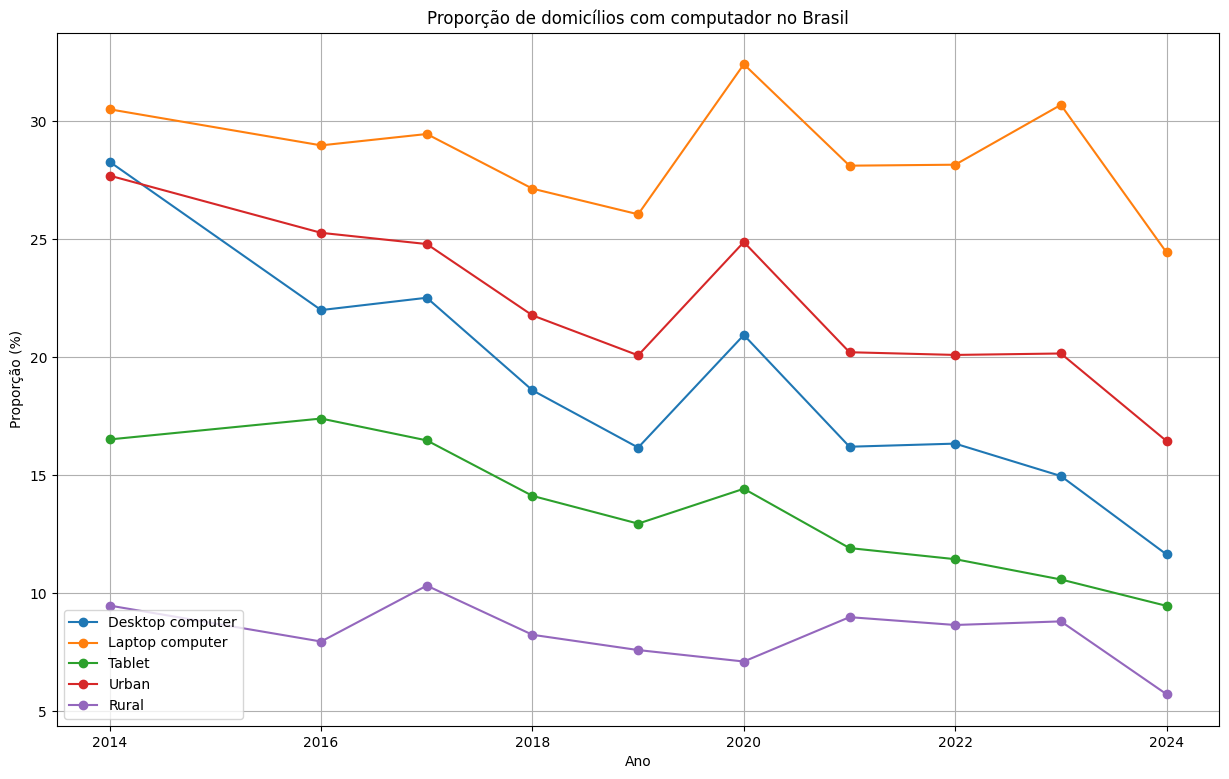

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
for col in ["Desktop computer", "Laptop computer", "Tablet", "Urban", "Rural"]:
    plt.plot (
        df_pivot["dataYear"],
        df_pivot[col],
        marker="o",
        label=col
    )
    
plt.xlabel("Ano")
plt.ylabel("Proporção (%)")
plt.title("Proporção de domicílios com computador no Brasil")
plt.legend()
plt.grid(True)
plt.show()


# Composição Por tipo

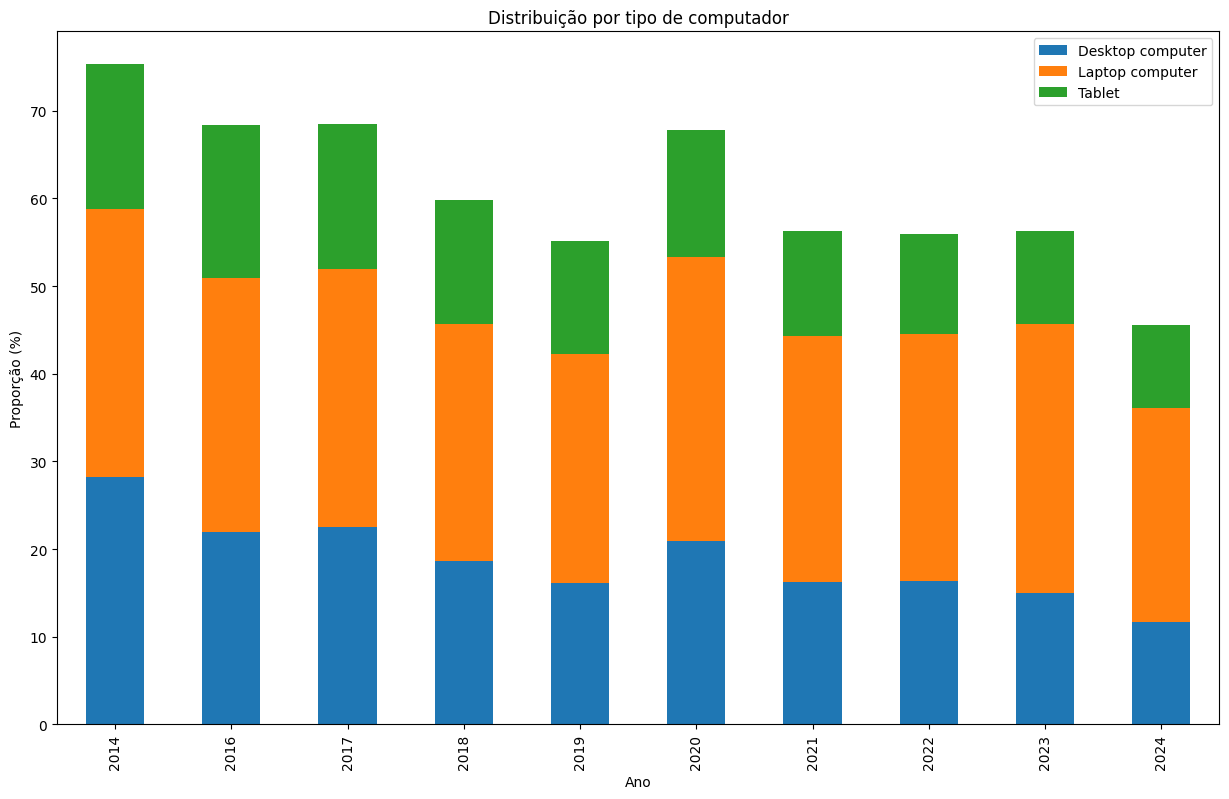

In [25]:
df_pivot.plot(
    x="dataYear",
    y = ["Desktop computer", "Laptop computer", "Tablet" ],
    kind = "bar",
    stacked = True,
    figsize = (15,9)
)

plt.xlabel("Ano")
plt.ylabel("Proporção (%)")
plt.title("Distribuição por tipo de computador")
plt.legend()
plt.show()

# Comparação Rural vs Urbano

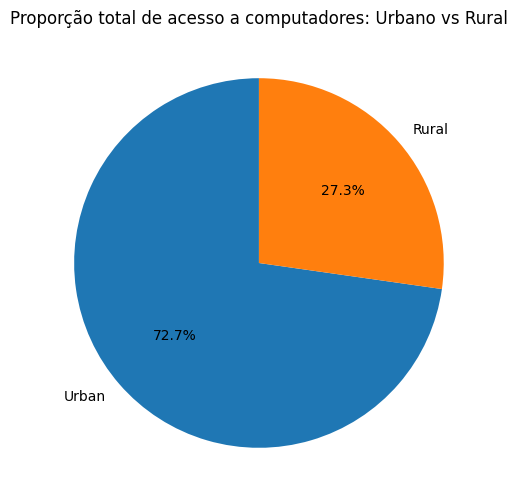

In [26]:
# Mostrar a diferença no acesso entre áreas urbanas e rurais
#Somar os totais de urban e rural

totais = df_pivot[["Urban", "Rural"]].sum()

# Plotar gráfico de pizza
totais.plot(
    kind='pie',
    autopct="%1.1f%%", #Mostrar valores como percentuais
    figsize=(6,6),
    startangle=90, #começar gráfico a partir do topo
    ylabel="",
    title = "Proporção total de acesso a computadores: Urbano vs Rural"
)

plt.show()

# Intensidade de valores com Heatmap

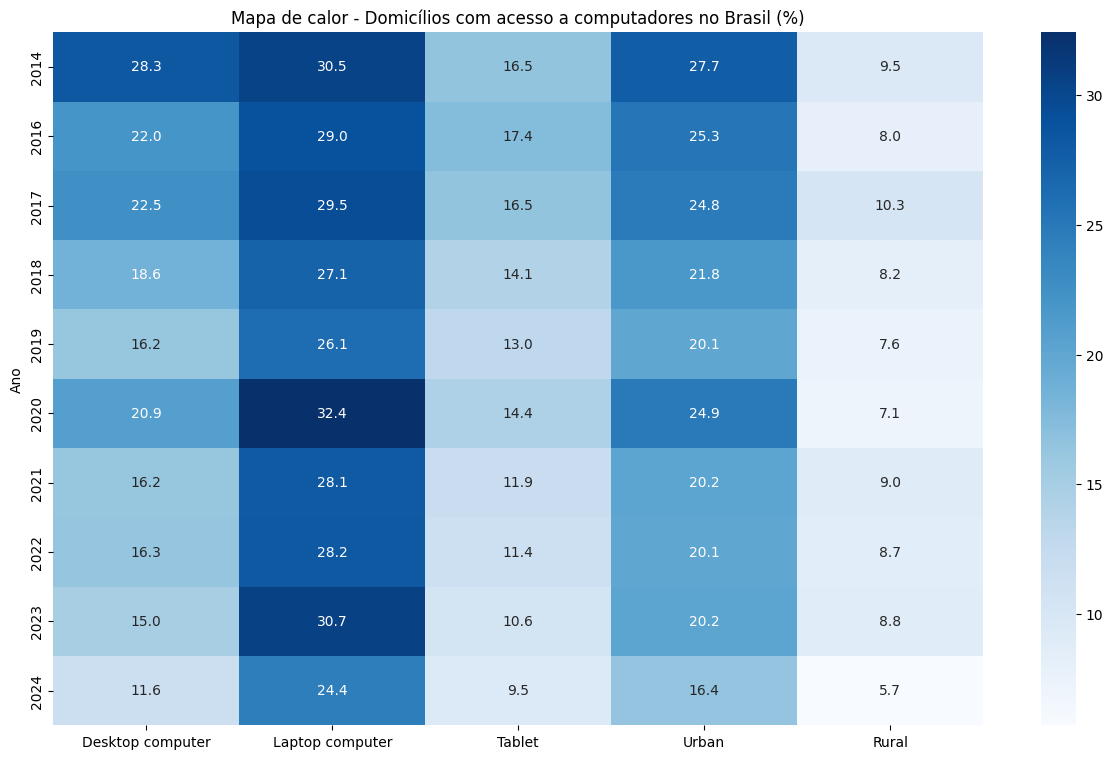

In [39]:
import seaborn as sns

plt.figure(figsize = (15,9))
sns.heatmap(
    df_pivot.set_index("dataYear")[["Desktop computer", "Laptop computer", "Tablet", "Urban", "Rural"]],
    annot = True, # Mostra os números nas células
    fmt=".1f",
    cmap = "Blues" 
)
plt.title ("Mapa de calor - Domicílios com acesso a computadores no Brasil (%)")
plt.ylabel("Ano")
plt.show()

# Animação da Evolução just for fun!

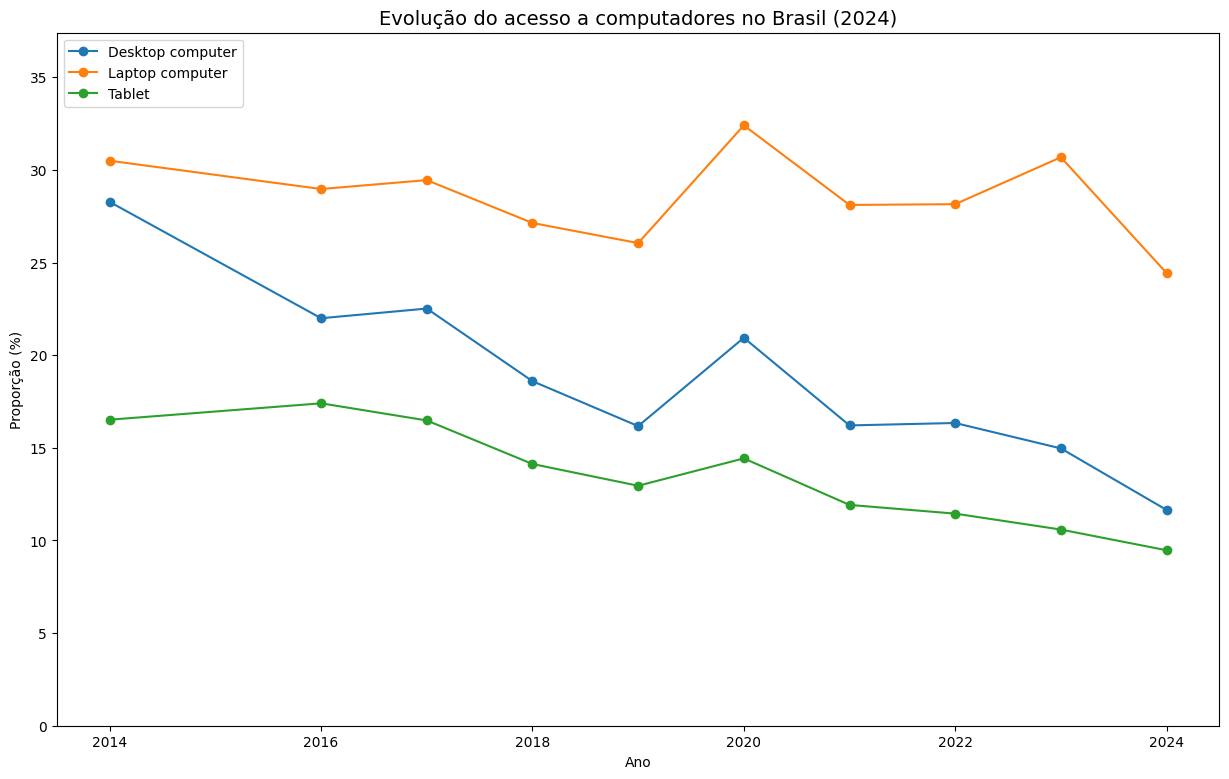

In [67]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

cols  = ["Desktop computer", "Laptop computer", "Tablet"]
anos = df_pivot["dataYear"].tolist()

fig,ax =  plt.subplots(figsize = (15,9))

def update(frame):
    ax.clear()  # limpa o gráfico a cada frame
    
    # Pega os dados até o ano do frame atual
    data = df_pivot[df_pivot["dataYear"] <= anos[frame]]
    
    # Desenha uma linha para cada tipo de computador
    for col in cols:
        ax.plot(data["dataYear"], data[col], marker="o", label=col)
    
    ax.set_title(f"Evolução do acesso a computadores no Brasil ({anos[frame]})", fontsize=14)
    ax.set_xlabel("Ano")
    ax.set_ylabel("Proporção (%)")
    ax.legend(loc="upper left")
    ax.set_ylim(0, df_pivot[cols].max().max() + 5)  # limite do eixo Y


ani = FuncAnimation(fig, update, frames=len(anos), interval=800, repeat=False)

ani.save("/kaggle/working/evolucao_computadores.gif", writer="pillow")

plt.show()




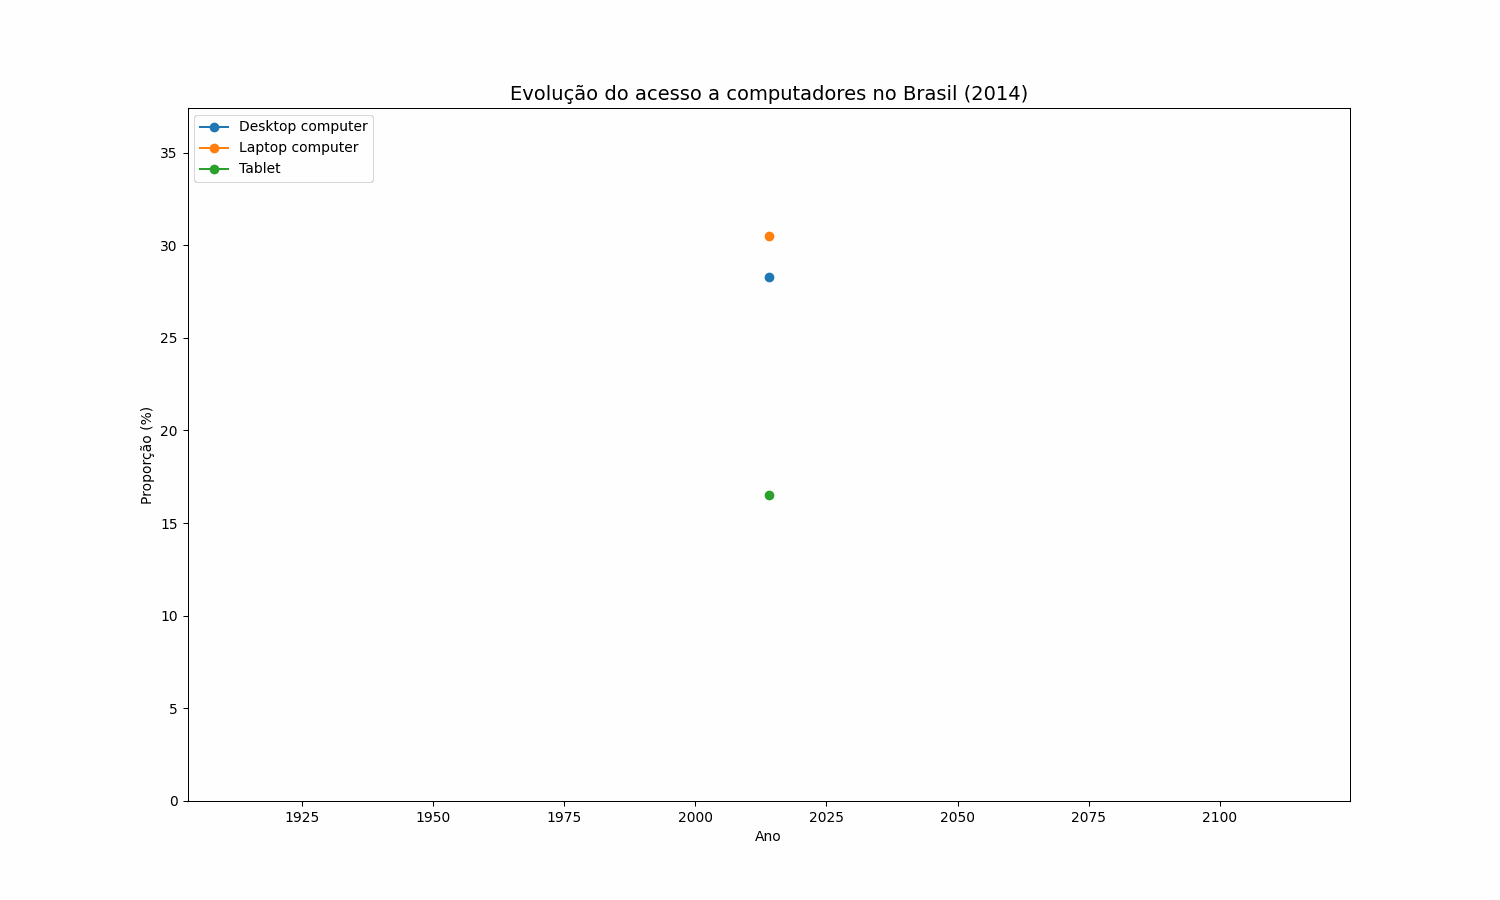

In [65]:
from IPython.display import Image
Image(filename="/kaggle/working/evolucao_computadores.gif")
